In [19]:
%load_ext autoreload
import sys
import os
src = os.path.dirname(os.path.abspath(''))
if src not in sys.path: sys.path.append(src)

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect
from src.helpers.h6_analysis_helpers import create_repositories_piechart, calculate_nested_frequencies

## 5 - How many people are usually directly involved in the project?

In [21]:
with connect() as session:
    repositories = pd.read_sql_table("repositories", session.connection())
repository_contributors = repositories[["id", "repository", "contributors"]]
print(f"In {len(repositories)} repositories {repository_contributors.contributors.sum()} contributors were found.")

In 10 repositories 760 contributors were found.


In [22]:
no_contributors = repository_contributors[repository_contributors.contributors == 0]
single_contributors = repository_contributors[repository_contributors.contributors == 1]
multiple_contributors = repository_contributors[repository_contributors.contributors >= 2]
print(f"Repositories with Single Contributors: {len(single_contributors)}\n"
      f"Repositories with Multiple Contributors: {len(multiple_contributors)}\n"
      f"Repositores with no contributors:{len(no_contributors)}", end='')
if len(no_contributors) == 0: print(" (As expected, given that they were filtered out)")

Repositories with Single Contributors: 1
Repositories with Multiple Contributors: 9
Repositores with no contributors:0 (As expected, given that they were filtered out)


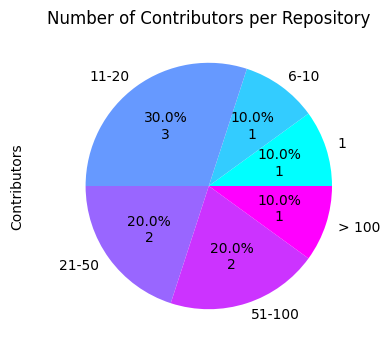

In [23]:
fig1, ax1 = fig4, ax4 = create_repositories_piechart(repository_contributors, "contributors")

## 6 - What is the average number of Commits in Data Science projects?
In this section we will investigate commits and how they behave. Merges were excluded.

In [24]:
with connect() as session:
    commits = pd.read_sql_table("commits", session.connection())
    print(f"In all {len(repositories)} repositories {len(commits)} commits were found")

In all 10 repositories 4248 commits were found


#### Average of Commits

In [25]:
commits_per_repository = commits.repository_id.value_counts()\
    .rename_axis('repository_id').to_frame("commits").reset_index(drop=False).sort_values(by='repository_id')
average =  commits_per_repository.commits.mean()
print(f"Considering all {len(commits_per_repository)} repositories, "
      f"on average each repository has {average} commits.")

Considering all 10 repositories, on average each repository has 424.8 commits.


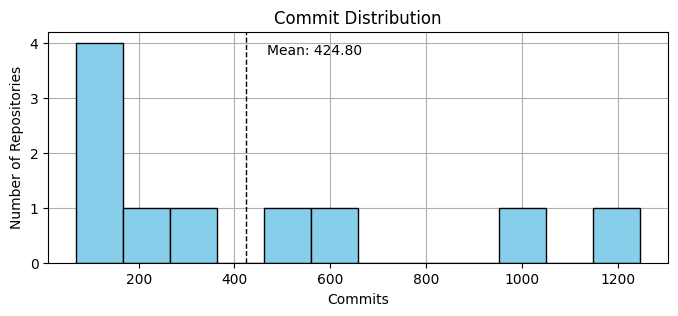

In [26]:
fig2, ax2 = plt.subplots(figsize=(8,3))
commits_per_repository.commits.hist(ax=ax2, bins= 12, color='skyblue', edgecolor='k',zorder=2)
plt.title('Commit Distribution')
plt.xlabel('Commits')
plt.ylabel('Number of Repositories')
plt.axvline(average, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(average*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(average));

### 6.1 - How often are commits made?
In this section we investigate how long it takes from one commit to another.

In [41]:
%autoreload
repositories_with_commits = commits_per_repository
repository_with_commits = calculate_nested_frequencies(repositories_with_commits, commits)
all_mean = repositories_with_commits.frequency_timedelta.mean()
print(f"Considering all {len(commits_per_repository)} repositories, "
      f"we frequency average of commits {all_mean}.")

Considering all 10 repositories, we frequency average of commits 8 days 02:05:20.586488940.


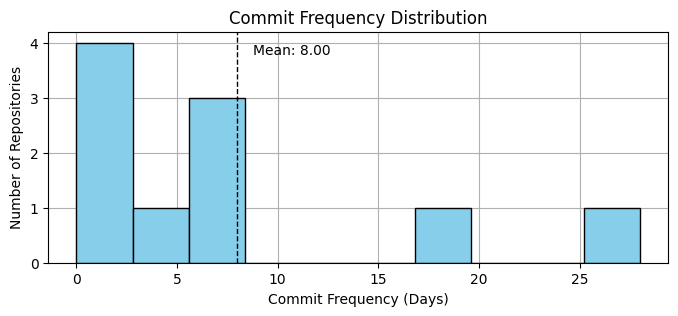

In [42]:
fig3, ax3 = plt.subplots(figsize=(8,3))
mean = all_mean.days
repositories_with_commits.frequency_days.hist(ax=ax3, color='skyblue', edgecolor='k',zorder=2)
plt.title('Commit Frequency Distribution')
plt.xlabel('Commit Frequency (Days)')
plt.ylabel('Number of Repositories')
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean));

## 7 - Como  o repositório é usado no github?
In this section we will explore how some of Git and Github features are used in the corpus.

### 7.1 - Branches

In [29]:
repository_branches = repositories[["id","repository","branches"]]
print(f"In {len(repositories)} repositories "
      f"{repository_branches.branches.sum()} branches were found.")

In 10 repositories 67 branches were found.


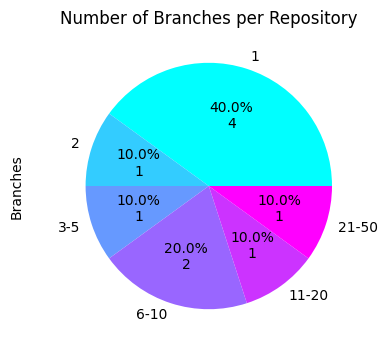

In [30]:
fig4, ax4 = create_repositories_piechart(repository_branches, "branches")

### 7.2 - Forks

In [31]:
repository_forks = repositories[["id","repository","forks"]]
print(f"In {len(repositories)} repositories "
      f"{repository_forks.forks.sum()} forks were found.")

In 10 repositories 35569 forks were found.


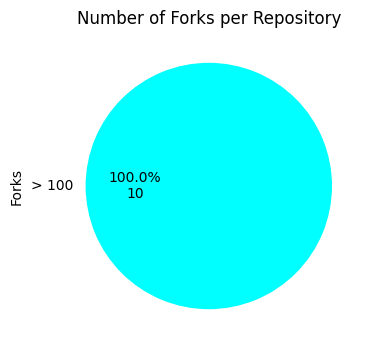

In [32]:
fig5, ax5 = create_repositories_piechart(repository_forks, "forks")

## 7.3 - Issues

In [33]:
repository_issues = repositories[["id","repository","issues"]]
print(f"In {len(repositories)} repositories "
      f"{repository_issues.issues.sum()} issues were found.")

In 10 repositories 838 issues were found.


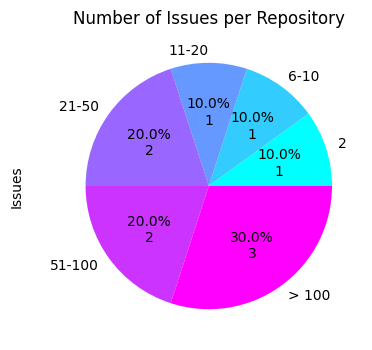

In [34]:
fig6, ax6 = create_repositories_piechart(repository_issues, "issues")

### 7.4 - Stars

In [35]:
repository_stargazers = repositories[["id","repository","stargazers"]]
print(f"In {len(repositories)} repositories "
      f"{repository_stargazers.stargazers.sum()} stargazers were found.")

In 10 repositories 108097 stargazers were found.


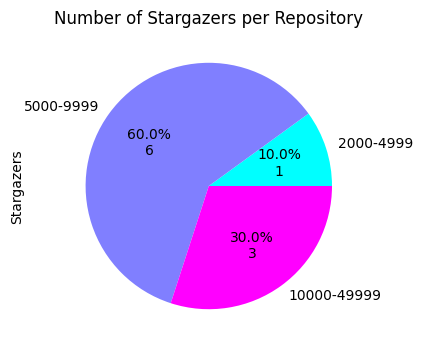

In [36]:
bins = [0, 99, 999, 1999, 4999, 9999, 49999, 1000000]
labels = ["< 100", "100-999", "1000-1999", "2000-4999", "5000-9999", "10000-49999", "> 50000"]
fig7, ax7 = create_repositories_piechart(repository_stargazers, "stargazers", bins=bins, labels=labels)